# H1 B Visa Application Analysis

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
from ggplot import *
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from geopy.geocoders import Nominatim
from matplotlib import style
style.use("ggplot")

In [2]:
h1b = pd.read_csv(r"C:\Users\Admin\Desktop\New folder\Plotting in Python\H1B Visualization\h1b_kaggle.csv")

In [3]:
#dropping unnecessary column1
h1b = h1b[list(h1b)[1:]]

In [4]:
#Removing Outliers from Prevailing wages
h1b.quantile(0.99904)  ### gives 300000
h1b = h1b[h1b["PREVAILING_WAGE"]<= 300000]

<IPython.core.display.Javascript object>


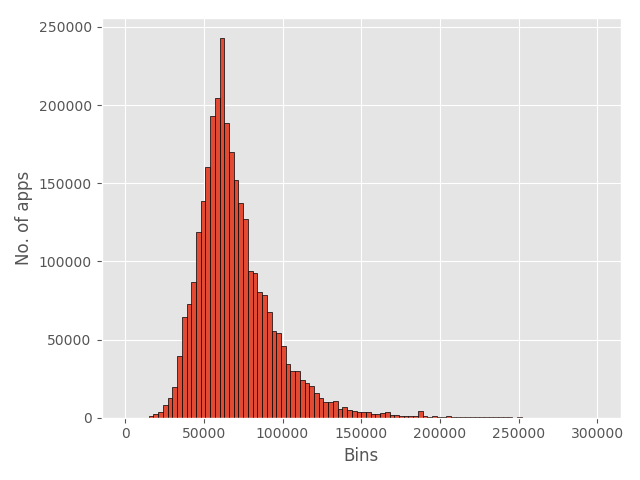

In [60]:
fig,ax=plt.subplots()

ax.hist(h1b["PREVAILING_WAGE"],bins=100,edgecolor="k")
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_xlabel("Bins")
ax.set_ylabel("No. of apps")
fig.tight_layout()

plt.show()

In [281]:
#Summarizing missing values on each column
for column in list(h1b):
    print("{} - {}".format(column,sum(pd.isnull(h1b[column]))))

CASE_STATUS - 0
EMPLOYER_NAME - 42
SOC_NAME - 17685
JOB_TITLE - 26
FULL_TIME_POSITION - 0
PREVAILING_WAGE - 0
YEAR - 0
WORKSITE - 0
lon - 107021
lat - 107021


In [5]:
h1b["EMPLOYER_NAME"].fillna("NO_EMP",inplace=True)

In [6]:
h1b["SOC_NAME"].fillna("NO_SOC_NAME",inplace=True)

In [7]:
h1b["JOB_TITLE"].fillna("NO_JOB_TITLE",inplace=True)

In [8]:
h1b["YEAR"] = (h1b["YEAR"]).astype(int)

In [9]:
summary=h1b.groupby(by=["YEAR","FULL_TIME_POSITION"]).size().reset_index()

<IPython.core.display.Javascript object>


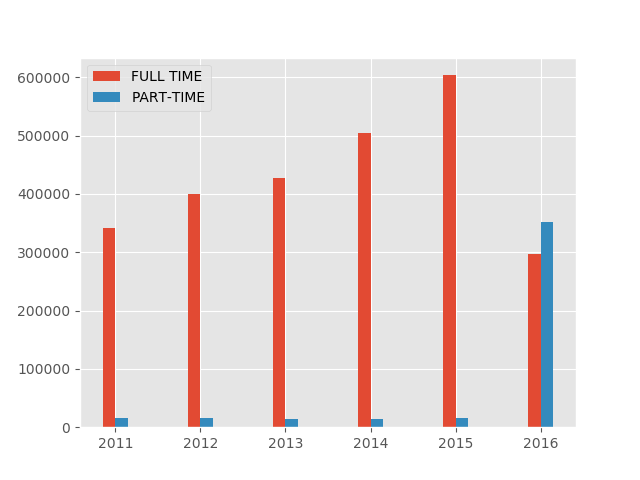

In [16]:
def loc_generator(orderedcategorylist, currentlist, gap):
    l = []
    i = 0
    for category in orderedcategorylist:
        if (category in currentlist):
            l.append(i)
        i+=gap
    return l

fig,ax = plt.subplots()

loc1 = np.array(loc_generator(list(summary["YEAR"].unique()),(summary[summary["FULL_TIME_POSITION"]=="Y"])["YEAR"].tolist(),1))
barwidth = 0.15

rect1 = ax.bar(loc1,summary[summary["FULL_TIME_POSITION"]=="Y"][0].tolist(),barwidth,color="C0")

loc2 = np.array(loc_generator(list(summary["YEAR"].unique()),(summary[summary["FULL_TIME_POSITION"]=="N"])["YEAR"].tolist(),1))
barwidth = 0.15

rect2 = ax.bar(loc2+barwidth,(summary[summary["FULL_TIME_POSITION"]=="N"])[0],barwidth,color="C1")
ax.set_xticks((loc1+barwidth+loc2)/2)
ax.set_xticklabels(summary["YEAR"].unique())
ax.legend((rect1[0], rect2[0]), ('FULL TIME', 'PART-TIME'))

plt.show()


In [11]:
h1btemp = h1b

In [12]:
h1btemp["STATES"] = h1btemp["WORKSITE"].str.split(",").str[1]

In [13]:
h1btemp["SOC_NAME"] = h1btemp["SOC_NAME"].str.upper()

In [30]:
top10jobapps = pd.DataFrame(h1btemp.groupby("SOC_NAME").size().nlargest(10),columns=["Counts"])
top10jobapps.reset_index(inplace=True)
top10jobapps

,SOC_NAME,Counts
0,COMPUTER SYSTEMS ANALYSTS,506179
1,"SOFTWARE DEVELOPERS, APPLICATIONS",414435
2,COMPUTER PROGRAMMERS,398216
3,"COMPUTER OCCUPATIONS, ALL OTHER",177803
4,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",83818
5,MANAGEMENT ANALYSTS,66807
6,FINANCIAL ANALYSTS,53488
7,ACCOUNTANTS AND AUDITORS,52777
8,MECHANICAL ENGINEERS,44204
9,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,40058


<IPython.core.display.Javascript object>


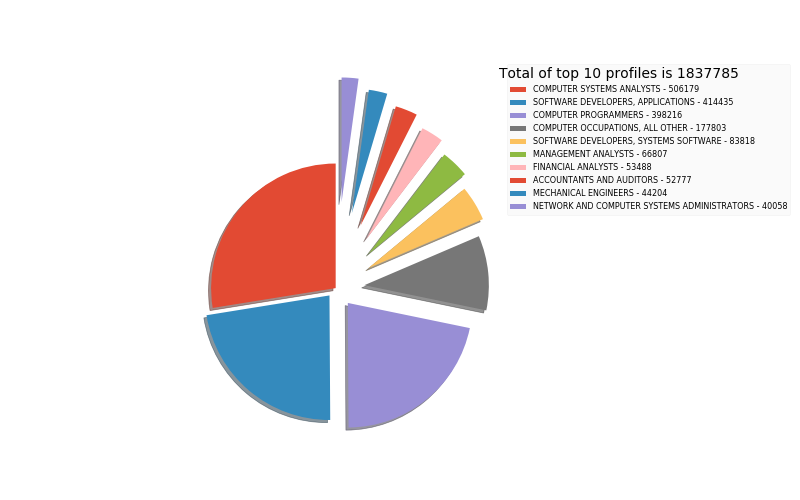

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))

top10jobapps["Sizes"] = (top10jobapps["Counts"])

explode = [0+i/10 for i in range(len(top10jobapps))]

p,t = ax.pie(list(top10jobapps["Counts"]), explode=explode,shadow=True, startangle=90, radius=1.3)

labels = ['{0} - {1:1}'.format(i,j) for i,j in zip(top10jobapps["SOC_NAME"], list(top10jobapps["Counts"]))]
box1 = ax.get_position()
ax.set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])

l = ax.legend(p,labels , loc="upper right", fontsize="xx-small",framealpha=0.2,
              bbox_to_anchor=(1.4, 1),
              title="Total of top 10 profiles is {}".format(sum(top10jobapps["Counts"])))
l.get_title().set_position((-30, 0))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [20]:
top10jobapps = pd.DataFrame(h1btemp.groupby("CASE_STATUS").size(),columns=["Counts"])
top10jobapps.reset_index(inplace=True)
top10jobapps

,CASE_STATUS,Counts
0,CERTIFIED,2615322
1,CERTIFIED-WITHDRAWN,202630
2,DENIED,91982
3,INVALIDATED,1
4,PENDING QUALITY AND COMPLIANCE REVIEW - UNASSI...,15
5,REJECTED,2
6,WITHDRAWN,89545


<IPython.core.display.Javascript object>


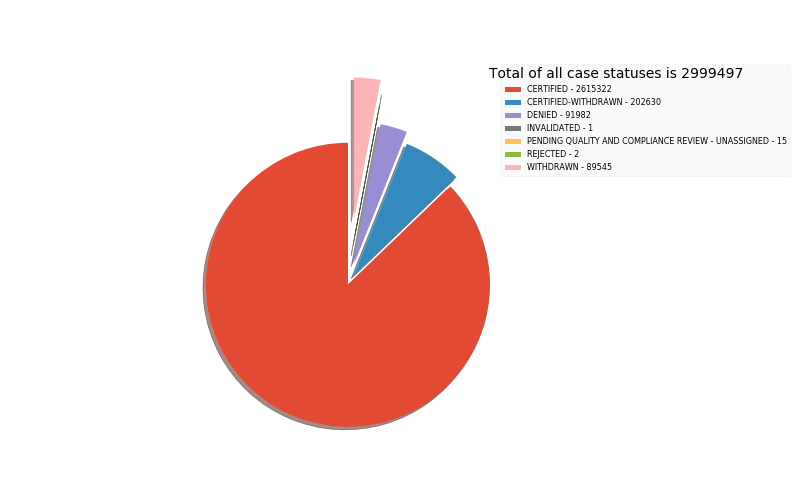

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))

top10jobapps["Sizes"] = (top10jobapps["Counts"])

explode = [0+i/10 for i in range(len(top10jobapps))]

p,t = ax.pie(list(top10jobapps["Sizes"]), explode=explode,shadow=True, startangle=90, radius=1.3)

labels = ['{0} - {1:1}'.format(i,j) for i,j in zip(top10jobapps["CASE_STATUS"], list(top10jobapps["Counts"]))]
box1 = ax.get_position()
ax.set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])

l = ax.legend(p,labels , loc="upper right", fontsize="xx-small",framealpha=0.2,
              bbox_to_anchor=(1.4, 1),
              title="Total of all case statuses is {}".format(sum(top10jobapps["Counts"])))
l.get_title().set_position((-30, 0))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<IPython.core.display.Javascript object>


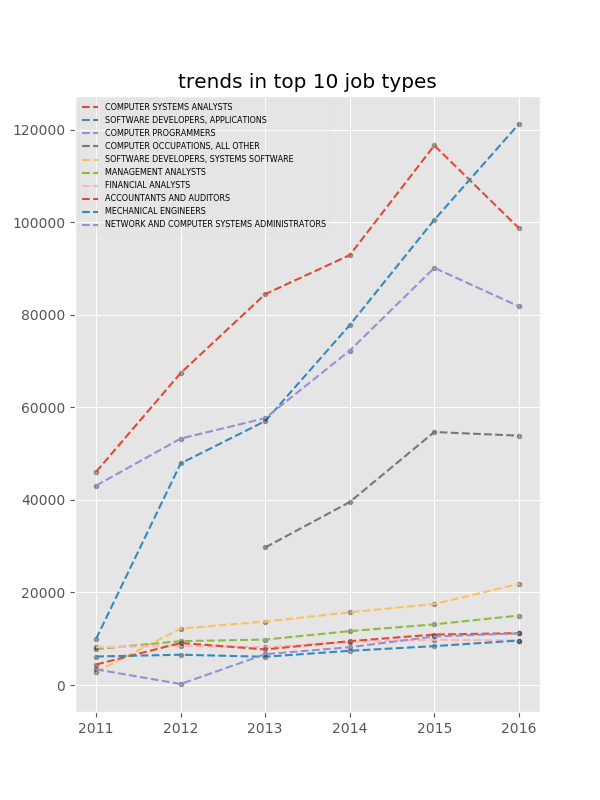

[]

In [33]:
top10jobapps = pd.DataFrame(h1btemp.groupby("SOC_NAME").size().nlargest(10),columns=["Counts"])
top10jobapps.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(6,8))
i = 0
for SOC_NAME in top10jobapps["SOC_NAME"]:
    temp = h1btemp[h1btemp["SOC_NAME"]==SOC_NAME].groupby("YEAR").size()
    ax.plot(temp,"ko",alpha=0.3,markersize=3)
    ax.plot(temp,color="C"+ str(i),linestyle='dashed',label=SOC_NAME)
    i+=1
    
ax.legend(loc="upper left", fontsize="xx-small",framealpha=0.2)
ax.set_title("trends in top 10 job types")

ax.plot()

In [34]:
h1btemp["STATE"] = h1btemp["WORKSITE"].str.split(",").str[1]

In [35]:
top10emps = pd.DataFrame(h1btemp.groupby("EMPLOYER_NAME").size().nlargest(10),columns=["Counts"])
top10emps.reset_index(inplace=True)
top10emps

,EMPLOYER_NAME,Counts
0,INFOSYS LIMITED,130567
1,TATA CONSULTANCY SERVICES LIMITED,64715
2,WIPRO LIMITED,48116
3,DELOITTE CONSULTING LLP,36734
4,IBM INDIA PRIVATE LIMITED,34194
5,ACCENTURE LLP,33444
6,MICROSOFT CORPORATION,25573
7,"HCL AMERICA, INC.",22677
8,ERNST & YOUNG U.S. LLP,18225
9,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,17522


<IPython.core.display.Javascript object>


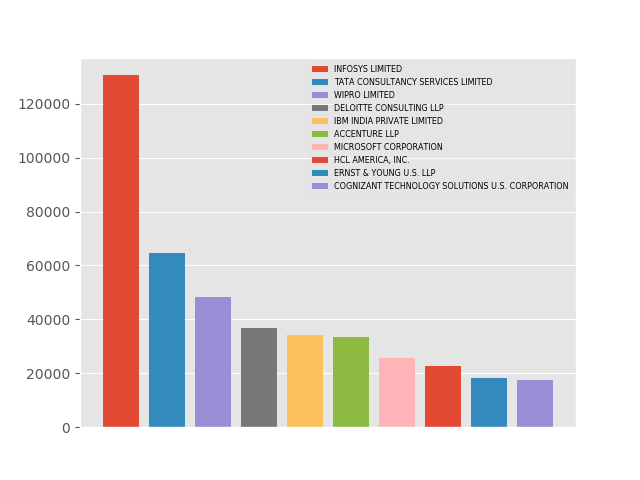

In [42]:

fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), rowspan=3,colspan=3)

locx = list(range(0,10))
barwidth = 0.35

for loc in locx:
    label = top10emps["EMPLOYER_NAME"][loc]
    bar = ax1.bar(loc,top10emps["Counts"][loc],label=label)
l = ax1.legend(loc="upper right", fontsize="xx-small",framealpha=0.2)
ax1.set_xticks([])

plt.show()

In [37]:
top10states = pd.DataFrame(h1btemp.groupby("STATES").size(),columns=["NOOFAPPS"])
top10states.set_index(top10states.index.str.strip())
top10states

,NOOFAPPS
STATES,
ALABAMA,10235
ALASKA,1394
ARIZONA,42006
ARKANSAS,14748
CALIFORNIA,559469
COLORADO,32007
CONNECTICUT,50218
DELAWARE,18120
DISTRICT OF COLUMBIA,22679


<IPython.core.display.Javascript object>


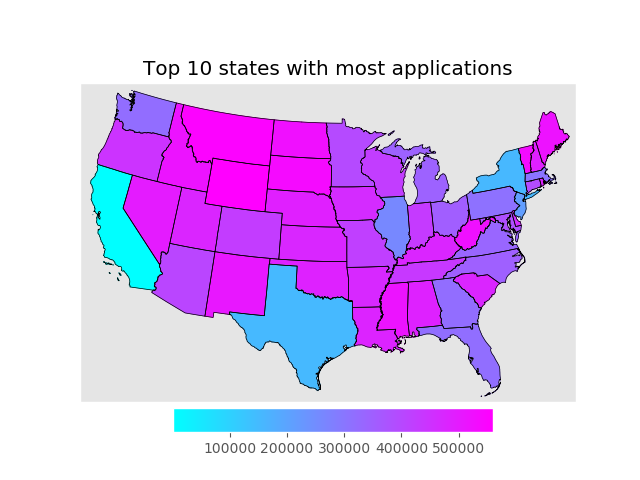

In [38]:
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.cm import ScalarMappable

fig,ax=plt.subplots()


m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

popdensity = top10states.set_index(top10states.index.str.strip())

legendcolor = []
colors={}
statenames=[]
patches = []

cmap = plt.cm.cool 
vmin = min(popdensity["NOOFAPPS"])
vmax = max(popdensity["NOOFAPPS"]) 
norm = Normalize(vmin=vmin, vmax=vmax)
mapper = ScalarMappable(norm=norm, cmap=cmap)

for shapedict in m.states_info:
    statename = shapedict['NAME'].upper()
    if statename in popdensity.index.values:
        pop = popdensity.loc[statename][0]
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    else:
        statenames.append(statename)
        colors[statename] = "darkblue"

ax = plt.gca() 
fig = plt.gcf()

for nshape,seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]]) 
    legendcolor.append(color)
    poly = Polygon(seg,facecolor=color,edgecolor=color,label="AZ")   
    ax.add_patch(poly)  
    
mappble = plt.gci()

plt.title('Top 10 states with most applications')
cax = fig.add_axes([0.27, 0.1, 0.5, 0.05]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
    

plt.show()

In [39]:
## highest paid profiles
highpayingjobs = pd.DataFrame({"PREVAILING_WAGE":h1btemp.groupby("SOC_NAME")["PREVAILING_WAGE"].median().nlargest(10)}).reset_index()

<IPython.core.display.Javascript object>


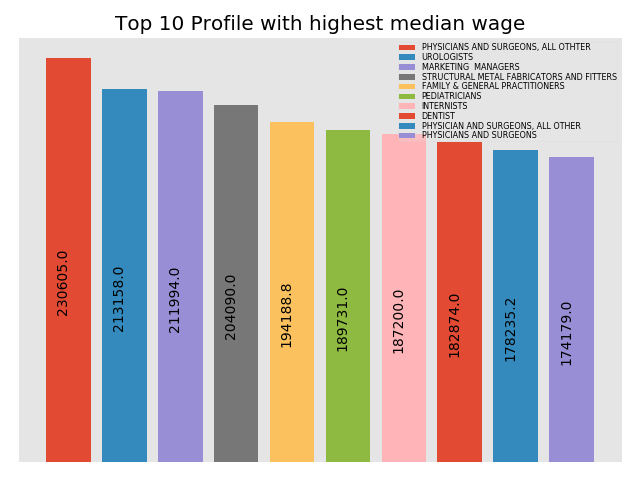

In [45]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), rowspan=3,colspan=3)

locx = list(range(0,10))
barwidth = 0.35

for loc in locx:
    label = highpayingjobs["SOC_NAME"][loc]
    bar, = ax1.bar(loc,highpayingjobs["PREVAILING_WAGE"][loc],label=label)
    ax1.text(bar.get_x()+barwidth/2,bar.get_height()/2,bar.get_height(),rotation='vertical')
l = ax1.legend(loc="upper right", fontsize="xx-small",framealpha=0.2, markerscale=5,labelspacing=0.1,borderpad=0.1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title("Top 10 Profile with highest median wage")
fig.tight_layout()

plt.show()

In [46]:
## top 10 profiles with most applications and their median salary
highpayingjobs = pd.DataFrame(h1btemp.groupby("SOC_NAME")["PREVAILING_WAGE"].agg(['count','median'])).reset_index()
highpayingjobs = highpayingjobs.nlargest(10,"count").reset_index()
highpayingjobs

,index,SOC_NAME,count,median
0,340,COMPUTER SYSTEMS ANALYSTS,506179,64043.0
1,1406,"SOFTWARE DEVELOPERS, APPLICATIONS",414435,78811.0
2,302,COMPUTER PROGRAMMERS,398216,58500.0
3,285,"COMPUTER OCCUPATIONS, ALL OTHER",177803,65666.0
4,1421,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",83818,88275.2
5,919,MANAGEMENT ANALYSTS,66807,64106.0
6,625,FINANCIAL ANALYSTS,53488,67204.8
7,14,ACCOUNTANTS AND AUDITORS,52777,53498.0
8,971,MECHANICAL ENGINEERS,44204,66726.0
9,1061,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,40058,62650.0


<IPython.core.display.Javascript object>


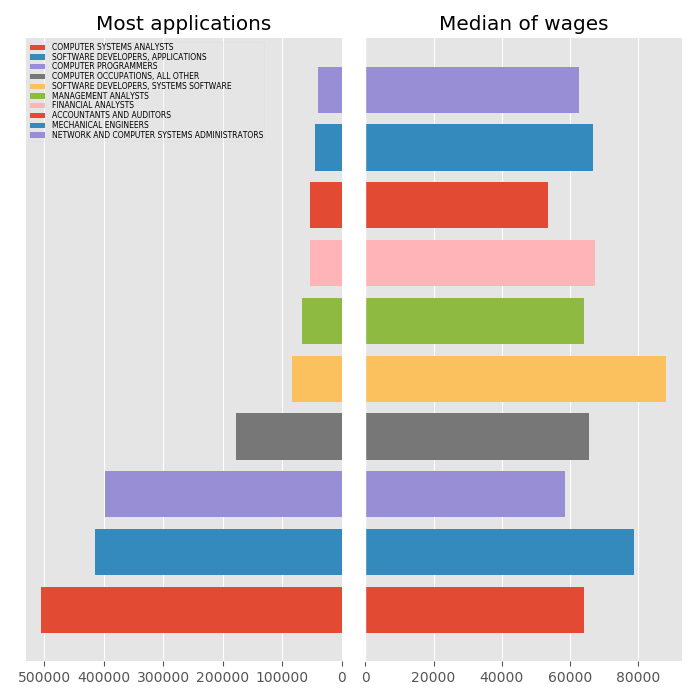

In [51]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,7))

locx = list(range(0,10))
barwidth = 0.35

for loc in locx:
    label = highpayingjobs["SOC_NAME"][loc]
    bar1, = ax[0].barh(loc,highpayingjobs["count"][loc],label=label)
#     ax[0].text(bar1.get_width()+1,bar1.get_y()+barwidth/2,int(bar1.get_width()),ha='left', va='bottom',rotation="vertical")
    bar, = ax[1].barh(loc,highpayingjobs["median"][loc],label=label)
#     ax[1].text(bar.get_width()+1,bar.get_y()+barwidth/2,bar.get_width(),rotation="vertical")

# ax[0].set_xticks([])
ax[0].set_yticks([])
# ax[1].set_xticks([])
ax[1].set_yticks([])
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
# ax[1].spines['left'].set_visible(False)

ax[0].invert_xaxis()

ax[0].set_title("Most applications")
ax[1].set_title("Median of wages")

box1 = ax[0].get_position()
ax[0].set_position([box1.x0, box1.y0, box1.width * 0.7, box1.height])
box2 = ax[1].get_position()
ax[1].set_position([box2.x0, box2.y0, box2.width * 0.7, box2.height])

fig.subplots_adjust(wspace=0, hspace=0)

l = ax[0].legend(loc="upper left", fontsize=5.5,framealpha=0.2, markerscale=5,labelspacing=0.1,borderpad=0.1
                 ,bbox_to_anchor=(0, 1))
fig.tight_layout()
# l.set_fontsize(20)

plt.show()

In [52]:
highpayingstates = pd.DataFrame(h1btemp.groupby("STATE")["PREVAILING_WAGE"].agg(["median"])).reset_index()
highpayingstates = highpayingstates.nlargest(10,"median")
highpayingstates["STATE"] = highpayingstates["STATE"].str.strip()
highpayingstates = highpayingstates.set_index('STATE')
highpayingstates

,median
STATE,
WASHINGTON,81432.0
CALIFORNIA,77501.0
OREGON,71188.2
MASSACHUSETTS,69243.0
CONNECTICUT,67059.0
DISTRICT OF COLUMBIA,66664.0
COLORADO,65957.0
VIRGINIA,65374.0
NEW YORK,65187.0


<IPython.core.display.Javascript object>


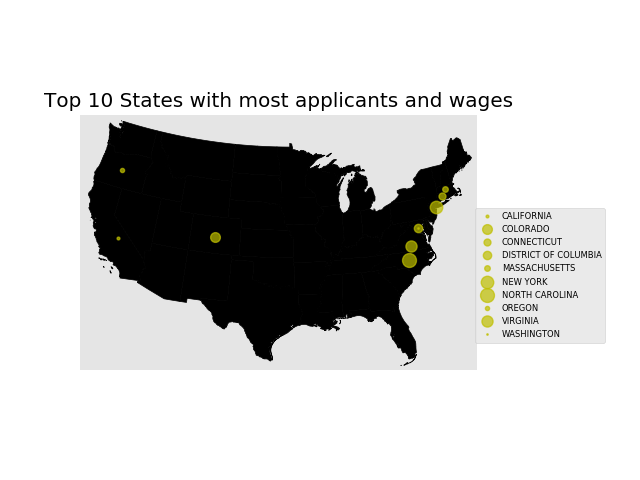

In [53]:
import matplotlib as mpl
from matplotlib.collections import PatchCollection
fig,ax=plt.subplots()

geolocator = Nominatim()


m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('st99_d00','states',drawbounds=True)


maxsize = np.sum(highpayingstates["median"])
ax = plt.gca() 
fig = plt.gcf()
i=0
statenames=[]
for shapedict in m.states_info:
    statename = shapedict['NAME'].upper()
    statenames.append(statename)
    
statenames = list(np.unique(statenames))

for nshape,seg in enumerate(m.states):
    poly = Polygon(seg,facecolor='k')
    ax.add_patch(poly)
points = []

for state in statenames:
    if state in highpayingstates.index:
        loc = geolocator.geocode(state)
        x, y = m(loc.longitude,loc.latitude)
#         y = loc.latitude
        size = highpayingstates.loc[state][0]
        pt, = ax.plot(x,y,'yo',alpha=0.7,markersize=highpayingstates.index.get_loc(state)+1,label=state)
        points.append(pt)


ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(points,list(highpayingstates.index))
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles,labels, fontsize=6,bbox_to_anchor=(.985, 0.65))


plt.title('Top 10 States with most applicants and wages')
plt.show()

In [54]:
## top 10 profiles with most applications and their median salary
highpayingemployer = pd.DataFrame(h1btemp.groupby("EMPLOYER_NAME")["PREVAILING_WAGE"].agg(['count','median'])).reset_index()
highpayingemployer = highpayingemployer.nlargest(10,"count").reset_index()
highpayingemployer

,index,EMPLOYER_NAME,count,median
0,101607,INFOSYS LIMITED,130567,67371.0
1,202535,TATA CONSULTANCY SERVICES LIMITED,64715,61381.0
2,230767,WIPRO LIMITED,48116,68141.0
3,57015,DELOITTE CONSULTING LLP,36734,71510.0
4,98168,IBM INDIA PRIVATE LIMITED,34194,67600.0
5,3520,ACCENTURE LLP,33444,71074.0
6,135567,MICROSOFT CORPORATION,25573,87547.0
7,91873,"HCL AMERICA, INC.",22677,68515.0
8,69969,ERNST & YOUNG U.S. LLP,18225,66539.0
9,45926,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,17522,67038.0


In [55]:
mostapps = list(h1btemp.groupby("EMPLOYER_NAME").size().nlargest(5).index)
mostapps

['INFOSYS LIMITED',
 'TATA CONSULTANCY SERVICES LIMITED',
 'WIPRO LIMITED',
 'DELOITTE CONSULTING LLP',
 'IBM INDIA PRIVATE LIMITED']

<IPython.core.display.Javascript object>


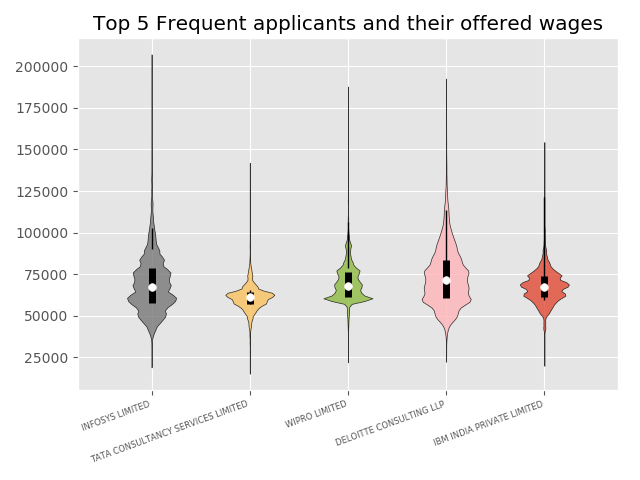

In [56]:

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,rotation=20,fontsize=6,ha='right')
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel("")


fig, ax = plt.subplots()

ax.set_title('Top 5 Frequent applicants and their offered wages')
for  employer, loc in zip(mostapps,list(range(len(mostapps)))):
    
    a = h1btemp[h1btemp["EMPLOYER_NAME"]==employer]["PREVAILING_WAGE"].tolist()
    parts = ax.violinplot(a, positions=[loc+1],showmeans=False, showmedians=False,showextrema=False)
    for pc in parts['bodies']:
        pc.set_facecolor("C"+str(loc+3))
        pc.set_edgecolor('black')
        pc.set_alpha(0.8)
    quartile1, medians, quartile3 = np.percentile(a, [25, 50, 75])
    whiskers = np.array([adjacent_values(a, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
    ax.scatter(loc+1, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(loc+1, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(loc+1, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# for ax in [ax1, ax2]:
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
set_axis_style(ax, mostapps)

fig.tight_layout()


plt.show()